# DiCoW: Diarization-Conditioned Whisper for Target Speaker ASR – JSALT 25 Competition

> 🎯 *Were you wondering if training on the eval set is allowed?*
> **Nope, it’s not.** ❌

Be sure to change the runtime type to **GPU** in the menu above:
**Runtime -> Change runtime type -> Hardware accelerator -> GPU!!!**

---

## 🏆 Competition Information

Welcome to the **DiCoW Target Speaker ASR Challenge!**

**Prizes** *(valid for one glorious evening only)*:

* 🥇 **1st Place:** 🍺 Infinite beers\* — until you start explaining quantum physics to a plant 🌱🤯🍻
  *(“Infinite” ends when you try to high-five the floor.)*

* 🥈 **2nd Place:** 🍺🍺🍺 3 beers — just enough to convince yourself you can do parkour over chairs 🪑🧗‍♂️

* 🥉 **3rd Place:** 🍺 1 beer — sip it like it’s liquid gold 🏅🍺✨

---

**Submission:** Submit your best performing systems to the [EMMA Leaderboard](https://huggingface.co/spaces/BUT-FIT/EMMA_leaderboard).

**Deadline:** 🗓️ *June 17th, 2025 at 16:00 CET*

**SUBMISSION\_TOKEN:** `emmA25`

---

## 🛠️ Challenge Tasks
1. Clone the DiCoW repository and set up the environment
2. Prepare the Libri2Mix dataset
3. Finetune Whisper tiny model using DiCoW
4. Evaluate on Libri2Mix clean test set
5. Submit results to EMMA leaderboard

---

## 📚 Table of Contents
1. [Introduction to MT-ASR, TS-ASR, and DiCoW](#intro)
    1. [Multi-Talker ASR (MT-ASR)](#mt_asr)
    2. [Target Speaker ASR (TS-ASR)](#ts_asr)
    3. [DiCoW: Diarization-Conditioned Whisper](#dicow)
2. [Environment Setup](#setup)
3. [Data Preparation](#data)
4. [Model Training](#training)
5. [Decoding & Evaluation](#decoding)
6. [Submission Guidelines](#submission)

---

## 📖 Resources
1. Repositories:
    - [DiCoW GitHub Repository](https://github.com/BUTSpeechFIT/TS-ASR-Whisper)
    - [DiCoW Inference Repository](https://github.com/BUTSpeechFIT/DiCoW)
2. Papers:
    - [Target Speaker ASR with Whisper](https://ieeexplore.ieee.org/document/10887683)
    - [DiCoW: Diarization-Conditioned Whisper for Target Speaker ASR](https://arxiv.org/abs/2501.00114)
    - [BUT/JHU System Description for CHiME-8 NOTSOFAR-1 Challenge](https://www.isca-archive.org/chime_2024/polok24_chime.html)
    - [BUT System for the MLC-SLM Challenge](http://arxiv.org/abs/2506.13414)
3. Demo:
    - [DiCoW Gradio Demo](https://pccnect.fit.vutbr.cz/gradio-demo/)
4. Leaderboard:
    - [EMMA Leaderboard](https://huggingface.co/spaces/BUT-FIT/EMMA_leaderboard)

---
## 1. INTRODUCTION TO MULTI-TALKER AUTOMATIC SPEECH RECOGNITION


![mt_asr](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/mt_asr.png?raw=1)

### The Challenge of Multi-Talker ASR

Automatic Speech Recognition (ASR) systems traditionally work well with single-speaker audio.
However, real-world scenarios often involve multiple speakers talking simultaneously, creating
several challenges:

1. **Overlapping Speech**: Multiple speakers talking at the same time
2. **Speaker Confusion**: Difficulty determining who said what
3. **Acoustic Interference**: Speech from one speaker masks another
4. **Variable Number of Speakers**: Unknown number of active speakers

### Approaches to Multi-Talker ASR

![mt_asr_approaches](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/mt_asr_approaches.png?raw=1)


1. **Speech Separation + ASR**: First separate speakers, then apply ASR
2. **E2E MT-ASR (SOT)**: Concatenate speaker-attributed transcriptions by emission time
3. **Target Speaker ASR**: Focus on specific speaker of interest

### Metrics for Multi-Talker ASR
1. Optimal Reference Combination Word Error Rate (ORC WER)
2. Concatenated minimum-Permutation Word Error Rate (cpWER)
3. Time-Constrained minimum-Permutation Word Error Rate (tcpWER)

https://github.com/fgnt/meeteval

https://groups.uni-paderborn.de/nt/meeteval/icassp2024-demo/poster_example.html?selection=28.6-38.7&minimaps=1

### Target Speaker ASR: Focus on Speaker of Interest

Target Speaker ASR (TS-ASR) addresses a practical scenario: given mixed audio with multiple
speakers, transcribe only the speech from a specific target speaker.


### Traditional TS-ASR Approaches:

1. Randomly initialized model and i-vector based speaker embeddings

![ts_asr_embed](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/ts_asr_embed.png?raw=1)

2. Pretrained ASR model with (better) speaker embeddings

![ts_asr_enrolment](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/ts_asr_enrolment.png?raw=1)

3. Pretrained ASR model directly conditioned on speaker enrolment

![whisper_enrolment](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/whisper_enrolment.png?raw=1)

### DICOW: DIARIZATION-CONDITIONED WHISPER

DiCoW (Diarization-Conditioned Whisper) represents a paradigm shift in Target Speaker ASR.
Instead of relying on speaker embeddings, DiCoW leverages speaker diarization outputs as
conditioning information.

![dicow](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/dicow.png?raw=1)

#### Advantages of DiCoW

1. **No Speaker Embeddings Required**: Eliminates dependency on embedding quality
2. **Better Generalization**: Works well with unseen speakers
3. **Simplified Workflow**: Direct conditioning on diarization outputs
4. **Maintains Whisper Performance**: Preserves accuracy on (multi-lingual) single-speaker data

#### STNO - Silence, Target, Non-Target, and Overlap Masks

Let $\mathbf{D} \in [0,1]^{S \times T}$, where $S$ is the number of speakers in the recording, and $T$ is the number of frames, represent the diarization output, with $d(s, t)$ denoting the probability that speaker $s$ is active in time frame $t$. Let $s_k$ represent the target speaker.
We define a distribution over the following mutually exclusive events for a frame at time $t$:

1. ${\mathcal{S}}$: Time frame $t$ represents silence.
2. ${\mathcal{T}}$: The target speaker, $s_k$, is the only active speaker in time frame $t$.
3. ${\mathcal{N}}$: One or more non-target speakers, $s \neq s_k$ are active and the target speaker, $s_k$, is not active at time frame $t$.
4. ${\mathcal{O}}$: The target speaker $s_k$ is active while at least one non-target speaker $s \neq s_k$ is also active at time frame $t$, denoting an overlap.


The probabilities of these events occurring at time frame $t$ can be calculated as:
1. $p_{\mathcal{S}}^t  = \prod_{s=1}^S (1 - d(s, t))$
2. $p_{\mathcal{T}}^t  = d(s_k, t)  \prod_{\substack{s=1 \\ s \neq s_k}}^S (1 - d(s, t))$
3. $p_{\mathcal{N}}^t  = \left(1 - p_{\mathcal{S}}^t\right) - d\left(s_k, t\right)$
4. $p_{\mathcal{O}}^t  = d(s_k, t) - p_{\mathcal{T}}^t$


This definition allows us to use a fixed-sized STNO (Silence, Target, Non-target, Overlap) mask $\mathbf{M}^t = \begin{bmatrix} p_{\mathcal{S}}^t & p_{\mathcal{T}}^t & p_{\mathcal{N}}^t & p_{\mathcal{O}}^t \end{bmatrix}^{\top}$.

### #Frame-Level Diarization Dependent Transformations


Let $\mathbf{Z}^l \in \mathbb{R}^{d_{{m}} \times T}$ represent the frame-by-frame inputs to the $l$-th (Transformer) layer.

We transform these hidden representations by applying four affine STNO layer- and class-specific transformations: $\mathbf{W}_{\mathcal{S}}^l, \mathbf{W}_{\mathcal{T}}^l, \mathbf{W}_{\mathcal{N}}^l, \mathbf{W}_{\mathcal{O}}^l \in \mathbb{R}^{d_{{m}} \times d_{{m}}}$ together with biases $\mathbf{b}_{\mathcal{S}}^l, \mathbf{b}_{\mathcal{T}}^l, \mathbf{b}_{\mathcal{N}}^l, \mathbf{b}_{\mathcal{O}}^l \in \mathbb{R}^{d_{m}}$ to obtain new speaker-specific hidden representations $\hat{\mathbf{Z}}^l = [\hat{\mathbf{z}}^l_1, \ldots, \hat{\mathbf{z}}^l_T]$ as:

$\hat{\mathbf{z}}^l_t = \left( \mathbf{W}_{\mathcal{S}}^l \mathbf{z}^l_t + \mathbf{b}_{\mathcal{S}}^l \right) p^t_{\mathcal{S}} +
\left( \mathbf{W}_{\mathcal{T}}^l \mathbf{z}^l_t + \mathbf{b}_{\mathcal{T}}^l \right) p^t_{\mathcal{T}}  \nonumber \\
 + \left( \mathbf{W}_{\mathcal{N}}^l \mathbf{z}^l_t + \mathbf{b}_{\mathcal{N}}^l\right) p^t_{\mathcal{N}} +
\left( \mathbf{W}_{\mathcal{O}}^l \mathbf{z}^l_t + \mathbf{b}_{\mathcal{O}}^l \right) p^t_{\mathcal{O}}.$


In other words, the hidden representations $\mathbf{z}^l_t$ are transformed using a convex combination of the four STNO class-specific affine transformations, weighted by the corresponding STNO class probabilities.

![dicow_full](https://github.com/Lakoc/JSALT_tutorial/blob/main/img/target_speaker_whisper_stno.drawio.png?raw=1)


---
## 2. Environment Setup
Let’s get things rolling by setting up your environment for training and evaluating the DiCoW model on the Libri2Mix dataset.
We’ll install all necessary dependencies and clone the repository.

### Step 1: Install Dependencies

In [1]:
with open("reqs_collab.txt", "w") as f:
    f.write(
        """accelerate>=0.33.0
          datasets>=2.21.0
          evaluate>=0.4.2
          huggingface-hub==0.24.6
          hydra-core==1.3.2
          intervaltree==3.1.0
          jiwer==2.5.2
          kaldiio==2.18.0
          lhotse==1.28.0
          librosa==0.10.2.post1
          meeteval==0.3.0
          pandas==2.2.2
          pyannote.core==5.0.0
          pyannote.database==5.1.0
          pyannote.metrics==3.2.1
          PyYAML==6.0.2
          transformers==4.41.2
          wandb>=0.19.0
          simplejson==3.20.1
          """)

In [2]:
# Install required packages
!pip install -q -r reqs_collab.txt
# !pip install -q gdown
!pip uninstall peft -y
!pip uninstall tensorflow -y

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.5/513.5 kB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.4/836.4 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 124.3 MB/

(Optionally) Use TensorBoard for monitoring training progress.

In [ ]:
# !pip install tensorboard --force-reinstall

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir=/content/TS-ASR-Whisper/exp/lsmix_tiny/runs

### Step 2: Clone the Repository


In [3]:
# Clone the DiCoW repository
!git clone https://github.com/BUTSpeechFIT/TS-ASR-Whisper.git
%cd TS-ASR-Whisper
!git checkout JSALT25_demo

# Initialize and update submodules
!git submodule init
!git submodule update
%cd ..

Cloning into 'TS-ASR-Whisper'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 321 (delta 152), reused 261 (delta 110), pack-reused 0 (from 0)
Receiving objects: 100% (321/321), 183.39 KiB | 5.92 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/TS-ASR-Whisper
Branch 'JSALT25_demo' set up to track remote branch 'JSALT25_demo' from 'origin'.
Switched to a new branch 'JSALT25_demo'
Submodule 'inference_pipeline' (https://github.com/BUTSpeechFIT/DiCoW.git) registered for path 'inference_pipeline'
Cloning into '/content/TS-ASR-Whisper/inference_pipeline'...
Submodule path 'inference_pipeline': checked out 'e9326bd536bf632e823357438b210102903ba620'
/content


---
## 3. Data Preparation

Time to prep the data!
We’ll download, unzip, and organize the Libri2Mix dataset so it’s ready for training and evaluation.

#### 1. Prepare directories


In [4]:
!mkdir -p data
!mkdir -p data/libri2mix
!mkdir -p data/manifests
!mkdir -p data/libri2mix/train-100
!mkdir -p data/libri2mix/dev
!mkdir -p data/libri2mix/test

#### 2. Download prepared Libri2Mix 100h clean dataset

There are **five download links** available for the Libri2Mix 100-hour clean dataset. Please **select the link based on where you're sitting in the classroom**:

* **First path:** If you're seated on the **far left side** of the room.
* **Second path:** If you're in the **middle of the left wing**.
* **Third path:** If you're in the **center of the room**.
* **Fourth path:** If you're in the **middle of the right wing**.
* **Fifth path:** If you're seated on the **far right side** of the room.

Use the corresponding [Google Drive link](https://drive.google.com/drive/folders/1ESYPaPBALrckPtqmV7b6YZPWfGrbb-9n?usp=sharing) for your area.

⚠️ *If you encounter a bandwidth quota issue on Google Drive*, don’t worry — simply use the provided bash script to download the dataset directly from our **Nextcloud** server instead.

The dataset is ready-to-use and includes 100 hours of clean, mixed speech derived from LibriSpeech.


In [10]:
import gdown

# gdown.download_folder("https://drive.google.com/drive/folders/1vZEroIOIa2H8JqAltGxFebBv_ukiKU4j?usp=sharing", use_cookies=False, quiet=True, output="data/libri2mix")
# gdown.download_folder("https://drive.google.com/drive/folders/1cI4r6Eq_uJscAQ55hUOMURadD50EiBKz?usp=sharing", use_cookies=False, quiet=True, output="data/libri2mix")
# gdown.download_folder("https://drive.google.com/drive/folders/1cOqYPowsXC76IYlkPPAH9E1u_KOHrQ3r?usp=sharing", use_cookies=False, quiet=True, output="data/libri2mix")
# gdown.download_folder("https://drive.google.com/drive/folders/1zNaH3eE5Gp9h65dBFlzpNJZgcnWA36Hw?usp=sharing", use_cookies=False, quiet=True, output="data/libri2mix")
# gdown.download_folder("https://drive.google.com/drive/folders/1ESYPaPBALrckPtqmV7b6YZPWfGrbb-9n?usp=sharing", use_cookies=False, quiet=True, output="data/libri2mix")


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1lhOaMWBBgZb7fm8IKwF3xStu1AmdRuFT

but Gdown can't. Please check connections and permissions.

In [11]:
%%bash
# Uncomment the following lines to download the dataset from Nextcloud server
# Cutsets
curl -L -o data/libri2mix/libri2mix_mix_clean_sc_dev_cutset.jsonl.gz https://nextcloud.fit.vutbr.cz/s/MHLxjrd8XWPCieE/download
curl -L -o data/libri2mix/libri2mix_clean_100_train_sc_cutset_30s.jsonl.gz https://nextcloud.fit.vutbr.cz/s/gyPBwcMM3Azqbpk/download
curl -L -o data/libri2mix/libri2mix_mix_clean_sc_test_cutset.jsonl.gz https://nextcloud.fit.vutbr.cz/s/gdDMe2EKdAn4Kx5/download

Data
curl -L -o data/libri2mix/train_mix_clean.tar.gz https://nextcloud.fit.vutbr.cz/s/oXkxkW59xDKLPgJ/download
curl -L -o data/libri2mix/dev_mix_clean.tar.gz https://nextcloud.fit.vutbr.cz/s/DmiAicG2aWLeLqm/download
curl -L -o data/libri2mix/test_mix_clean.tar.gz https://nextcloud.fit.vutbr.cz/s/WACLidXg78BgesB/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  523k  100  523k    0     0   294k      0  0:00:01  0:00:01 --:--:--  937k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3444k  100 3444k    0     0  1337k      0  0:00:02  0:00:02 --:--:-- 3164k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  490k  100  490k    0     0   303k      0  0:00:01  0:00:01 --:--:--  636k
bash: line 7: Data: command not found
  % Total    %

#### 3. Unzip downloaded datasets

In [12]:
!tar -xzf data/libri2mix/train_mix_clean.tar.gz -C data/libri2mix/train-100
!tar -xzf data/libri2mix/dev_mix_clean.tar.gz -C data/libri2mix/dev
!tar -xzf data/libri2mix/test_mix_clean.tar.gz -C data/libri2mix/test

#### 4. Fix paths in the dataset manifests

In [13]:
from lhotse import load_manifest
import os

if __name__ == "__main__":
    for cutset, out in [
        ("data/libri2mix/libri2mix_clean_100_train_sc_cutset_30s.jsonl.gz",
         "data/manifests/libri2mix_clean_100_train_sc_cutset_30s.jsonl.gz"),
        ("data/libri2mix/libri2mix_mix_clean_sc_dev_cutset.jsonl.gz",
         "data/manifests/libri2mix_mix_clean_sc_dev_cutset.jsonl.gz"),
        ("data/libri2mix/libri2mix_mix_clean_sc_test_cutset.jsonl.gz",
         "data/manifests/libri2mix_mix_clean_sc_test_cutset.jsonl.gz")]:
        cset = load_manifest(cutset)
        for r in cset:
            for src in r.recording.sources:
                src.source = src.source.replace(
                    'PATH_TO_BE_REPLACED',
                    os.path.abspath('data/libri2mix'))
            for s in r.supervisions:
                s.alignment = None

        cset.to_file(out)

#### 5. Check the dataset
Here’s what you’ll find in the training cutset:

* 💬 100 hours of clean, preprocessed speech
* 🎙️ Each cut contains audio with overlapping speakers
* 📝 Supervisions include speaker IDs and transcriptions

This subset was created by mixing two LibriSpeech samples into one audio file.


In [14]:
from lhotse import load_manifest

train_cutset = load_manifest("data/manifests/libri2mix_clean_100_train_sc_cutset_30s.jsonl.gz")
train_cutset.describe()

Cut statistics:
╒═══════════════════════════╤══════════╕
│ Cuts count:               │ 13900    │
├───────────────────────────┼──────────┤
│ Total duration (hh:mm:ss) │ 56:22:03 │
├───────────────────────────┼──────────┤
│ mean                      │ 14.6     │
├───────────────────────────┼──────────┤
│ std                       │ 1.7      │
├───────────────────────────┼──────────┤
│ min                       │ 3.2      │
├───────────────────────────┼──────────┤
│ 25%                       │ 14.1     │
├───────────────────────────┼──────────┤
│ 50%                       │ 15.0     │
├───────────────────────────┼──────────┤
│ 75%                       │ 15.7     │
├───────────────────────────┼──────────┤
│ 99%                       │ 16.8     │
├───────────────────────────┼──────────┤
│ 99.5%                     │ 17.0     │
├───────────────────────────┼──────────┤
│ 99.9%                     │ 17.2     │
├───────────────────────────┼──────────┤
│ max                       │ 24.5     │


Want to see (and hear) what the data looks like?
Each cut includes a mixed audio recording with annotations for every speaker involved.

1624: who accuse everything that passes before them of everything which has befallen them and who are always ready to cast upon the first person who comes to hand as a legitimate grievance the sum total of the deceptions the bankruptcies and the calamities of their lives
7059: with the habit he had of touching it there with the tip of his tongue made annie think of a cat that had been at the cream i've been hoping to call with missus wilmington to pay my respects but i've been away a great deal this season and and


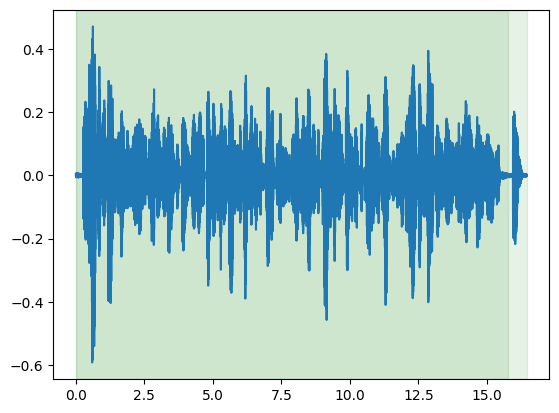

In [15]:
sample = train_cutset[0]
print(f"{sample.supervisions[0].speaker}: {sample.supervisions[0].text}")
print(f"{sample.supervisions[1].speaker}: {sample.supervisions[1].text}")
sample.plot_audio()
sample.play_audio()

#### 6. Try It in the DiCoW Gradio App:
Want a quick test without training anything?
Submit a sample file to the DiCoW [Gradio demo app](https://pccnect.fit.vutbr.cz/gradio-demo/) and see how the pretrained model transcribes overlapping speakers.
🎧 You can also upload your own audio to test it live!

In [16]:
import torchaudio
import torch
waveform = sample.load_audio()
torchaudio.save("l2mix_sample.wav", src=torch.tensor(waveform), sample_rate=16_000)

#### 7. Prepare a Small Dev Set for Quick Testing
For quick iteration, you can create a small development set.
A sample of **128 cuts** is usually enough to get a rough performance estimate.
(If you prefer full accuracy, use the complete dev set with 3000 cuts.).


In [17]:
from lhotse import load_manifest

devset = load_manifest("data/manifests/libri2mix_mix_clean_sc_dev_cutset.jsonl.gz")
devset =devset.subset(first=128)
devset.to_file("data/manifests/libri2mix_mix_clean_sc_dev_cutset_100.jsonl.gz")

In [19]:
import os
MANIFEST_DIR = os.path.abspath("data/manifests")
os.environ["MANIFEST_DIR"] = MANIFEST_DIR
os.environ["TRAIN_CUTSET"] = f"{MANIFEST_DIR}/libri2mix_clean_100_train_sc_cutset_30s.jsonl.gz"
os.environ["DEV_CUTSET"] = f"{MANIFEST_DIR}/libri2mix_mix_clean_sc_dev_cutset.jsonl.gz"
os.environ["TEST_CUTSET"] = f"{MANIFEST_DIR}/libri2mix_mix_clean_sc_test_cutset.jsonl.gz"
os.environ["TOYSET_CUTSET"] = f"{MANIFEST_DIR}/libri2mix_mix_clean_sc_dev_cutset_100.jsonl.gz"

----
## 4. Model Training
Let’s make sure everything is working before we commit to a full training run.

In [20]:
%cd TS-ASR-Whisper

/content/TS-ASR-Whisper



#### Step 1: Prepare the decoding configuration file

In [21]:
with open("configs/decode/toyset_decoding.yaml", "w") as f:
    f.write(
"""
# @package _global_
experiment: libri2mix_decode_both

model:
  whisper_model: "openai/whisper-tiny"
data:
  eval_cutsets: "${oc.env:TOYSET_CUTSET}"
  train_cutsets: "${oc.env:TOYSET_CUTSET}"
  dev_cutsets: "${oc.env:TOYSET_CUTSET}"
  eval_text_norm: "whisper_nsf"
training:
  decode_only: true
  bf16: false
  bf16_full_eval: false
  eval_metrics_list: [ "tcp_wer", "cp_wer"]
  per_device_eval_batch_size: 16
  dataloader_num_workers: 4
  dataloader_prefetch_factor: 1
  dataloader_pin_memory: true
"""
    )

##### Step 2: Export the environment variables for decoding

In [22]:
import os
os.environ["SRC_ROOT"] = os.path.abspath(".")
os.environ["WANDB_ANONYMOUS"] = "allow"
#os.environ["WANDB_ENTITY"] = ""  # Set your Weights & Biases entity
os.environ["WANDB_PROJECT"] = "DiCoW_playground"
os.environ["WANDB_RUN_ID"] = "libri2mix_decode_both"
os.environ["HF_HOME"] = "hf_cache"
os.environ["PYTHONPATH"] = f"{os.environ['SRC_ROOT']}"
os.environ["EXPERIMENT_PATH"] = f"{os.environ['SRC_ROOT']}/exp/{os.environ.get('EXPERIMENT', '')}"
os.environ["LIBRI_TRAIN_CACHED_PATH"] = ""
os.environ["LIBRI_DEV_CACHED_PATH"] = ""
os.environ["AUDIO_PATH_PREFIX"] = ""
os.environ["AUDIO_PATH_PREFIX_REPLACEMENT"] = ""

#### Step 3: Run the decoding script
Start by checking that your environment is correctly set up.
Try running the decoding script on a small dataset.
You’ll notice that a randomly initialized model performs poorly — no surprise there! Let’s fix that with some fine-tuning.


In [23]:
!python src/main.py +decode=toyset_decoding

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Config: Cfg(model=ModelArguments(ctc_weight=0.3, pretrained_encoder=None, whisper_model='openai/whisper-tiny', use_qk_biasing=False, shift_pos_embeds=False, reinit_encoder_from=None, reinit_from=None, target_amp_is_diagonal=True, target_amp_bias_only=False, target_amp_use_silence=True, target_amp_use_target=True, target_amp_use_overlap=True, target_amp_use_non_target=True, apply_target_amp_to_n_layers=-1, target_amp_init='disparagement', prefixes_to_preheat=['model.encoder.additional_layer', 'model.encoder.additional_self_attention_layer', 'model.encoder.lm_head', 'model.encoder.subsample_conv1', 'model.encoder.subsample_conv2', 'model.encoder.target_amplifiers', 'model.encoder.blank_projection'

#### Step 4: Check the decoding results via meeteval

In [24]:
import meeteval
from meeteval.viz.visualize import AlignmentVisualization

folder = r'exp/libri2mix_decode_both/test/0/wer/1919-142785-0014_3000-15664-0027'
av = AlignmentVisualization(
    meeteval.io.load(folder + '/ref.json'),
    meeteval.io.load(folder + '/tcp_wer_hyp.json')
)
display(av)

#### 5. DiCoW Training
Now it’s time to train!
We’ll use the **tiny Whisper model** as the base and fine-tune it with DiCoW on the Libri2Mix dataset.

Create a training config for the `DiCoW-tiny` model and launch your training run.

🏁 You can stop training anytime you're happy with the results and jump to decoding.


In [26]:
with open("configs/train/tiny_l2mix.yaml", "w") as f:
    f.write(
"""
# @package _global_
defaults:
  - /train/icassp/table1_model_comparisons/base

experiment: lsmix_tiny
wandb:
  project: jsalt25_dicow_challenge
model:
  whisper_model: openai/whisper-tiny
  reinit_encoder_from: null
  target_amp_bias_only: true
  target_amp_use_silence: false
  target_amp_use_target: true
  target_amp_use_overlap: false
  target_amp_use_non_target: false
data:
  train_text_norm: "whisper_nsf"
  use_timestamps: true
  eval_cutsets: "${oc.env:TEST_CUTSET}"
  train_cutsets: "${oc.env:TRAIN_CUTSET}"
  dev_cutsets: "${oc.env:TOYSET_CUTSET}"
  eval_text_norm: "whisper_nsf"

training:
  warmup_steps: 2000
  remove_timestamps_from_ctc: true
  overall_batch_size: 24
  learning_rate: 1e-5
  per_device_eval_batch_size: 16
  bf16: false
  bf16_full_eval: false
  fp16: true
  eval_metrics_list: [ "tcp_wer", "cp_wer"]
  eval_strategy: steps
  save_strategy: steps
  eval_steps: 200
  save_steps: 200
  use_amplifiers_only_n_epochs: 0
  report_to: ["tensorboard"]
"""
    )

### Are you paying attention? 😈

If not, you might miss an important detail: **we are *not* using FDDTs properly in this config**.
Take a look at the `TargetSpeakerAmplifier` class in [`src/models/whisper_ctc.py`](src/models/whisper_ctc.py).

> 💀 Oh no — it's even worse: **FDDTs aren't fully implemented** (yet).
> Follow the equation above, or dive into the codebase here:
> 👉 [https://github.com/BUTSpeechFIT/TS-ASR-Whisper](https://github.com/BUTSpeechFIT/TS-ASR-Whisper)

While you're there, feel free to ⭐ star the repo if you find it useful.


### Ready to start training?

Oh nooooooo! 😱 *One more thing...*
Looks like someone went off the rails and decided to **break your code by adding today’s date to the STNO masks**. 😭

Let’s fix that:
Check the `src/data/local_datasets.py` script — that's where the STNO masks are computed.


In [ ]:
!python src/main.py +train=tiny_l2mix

### Not happy with the results? Perfect. That means you're ready to experiment. 😈

#### Quick tweaks to try:

* 🔁 Swap in the pretrained CTC checkpoint - https://nextcloud.fit.vutbr.cz/s/2gzG7RyH3Pog734/download.
* ⚙️ Tweak training params: batch size, learning rate, warmup steps (`configs/base.yaml` has you covered).
* 🧪 Pretrain FDDT parameters for 1–2 epochs via `use_amplifiers_only_n_epochs`.
* 🎯 Use *bias-only* mode for FDDT (`target_amp_is_diagonal`, `target_amp_bias_only`).
* 📉 Reduce the number of FDDT layers with `apply_target_amp_to_n_layers`.
* ⚖️ Adjust the CTC loss weight via `ctc_weight`.
* 🚀 Enable joint CTC/Attention beam decoding with `generation_num_beams`, `decoding_ctc_weight`, and play with length penalty & friends.
Here’s a tightened-up, well-formatted version that keeps the humor and clarity intact:


#### Want more of a challenge?

* 🧨 **Inject noise into the STNO masks**
  File: `TS-ASR-Whisper/src/data/local_datasets.py`
  You’ve already mastered STNO masks — so this should be easy... right? 😏

* 🧬 **Change where FDDT is applied inside the model**
  File: `TS-ASR-Whisper/src/models/whisper_ctc.py`
  Try suppressing the signal *before* adding positional embeddings. Or *after* the first layer. Or maybe *right before* the final layer. Be bold.

* 🧠 **Make TS-ASR instances aware of each other**
  File: `TS-ASR-Whisper/src/models/whisper_ctc.py`
  Not bored yet? Take a look at Section 4.5: *Co-Attention Module for Speaker Interaction* in the DiCoW paper.
  It’s like group therapy for your speakers. 🤝

* 🤖 **Use LLMs to postprocess model outputs** -
  Because why not let GPT clean up your mess?
  *Actually... nah, don’t do that.*




---
## 5. Decoding & Evaluation

Congrats — you’ve officially trained the DiCoW model on Libri2Mix! 🎉👏
Time to see if it actually works. 😅

Let’s decode the test set and find out how well (or weirdly) your model performs. 🔍📊

In [ ]:
with open("configs/decode/tiny_test.yaml", "w") as f:
    f.write(
"""
# @package _global_
experiment: libri2mix_clean

model:
  whisper_model: "openai/whisper-tiny"
  reinit_from: "/content/TS-ASR-Whisper/exp/lsmix_tiny/checkpoint-600/model.safetensors"
data:
  eval_cutsets: "${oc.env:TEST_CUTSET}"
  train_cutsets: "${oc.env:TOYSET_CUTSET}"
  dev_cutsets: "${oc.env:TOYSET_CUTSET}"
  eval_text_norm: "whisper_nsf"
training:
  decode_only: true
  bf16: false
  bf16_full_eval: false
  dataloader_num_workers: 4
  dataloader_prefetch_factor: 1
  dataloader_pin_memory: true
  generation_max_length: 64
  eval_metrics_list: [ "tcp_wer", "cp_wer"]
  per_device_eval_batch_size: 64
"""
    )

In [ ]:
!python src/main.py +decode=tiny_test

---
## 6. Generate Submission

You’ve decoded, evaluated, and now it’s time for the grand finale: submission time! 📤

Gather all your hypotheses and create that shiny submission file. Once it’s ready, head over to the [EMMA Leaderboard](https://huggingface.co/spaces/BUT-FIT/EMMA_leaderboard) and show the world what your model can do.

In [ ]:
import meeteval
import glob
hyps = []
for hyp_file in glob.glob("/content/TS-ASR-Whisper/exp/libri2mix_clean/test/0/wer/*/tcp_wer_hyp.json"):
    hyps.append(meeteval.io.load(hyp_file))
hyp = meeteval.io.SegLST.merge(*hyps)
hyp.dump(f"/content/my_submission.json")

Congrats — you’ve officially trained and evaluated the DiCoW model on Libri2Mix. 🥳

Now go claim your spot on the leaderboard… and maybe a prize (or at least a celebratory beer). 🍺🍺🍺

Personally? I’m already thirsty.